<a href="https://colab.research.google.com/github/Tony1222/WQD7005-Data-Mining-Group-Project/blob/main/Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Confusion Matrix: Logistic Regression
 [[117   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0]
 [ 32   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0]
 [  3   0   0   0   0   0   0   0]
 [107   0   0   0   0   0   0   0]
 [111   0   0   0   0   0   0   0]
 [ 77   0   0   0   0   0   0   0]]
Confusion Matrix: Decision Tree
 [[117   0   0   0   0   0   0   0]
 [  0   0   0   0   0   1   0   0]
 [  0   0  28   0   1   0   0   3]
 [  0   0   0   1   0   0   0   1]
 [  0   0   0   0   2   0   1   0]
 [  0   1   0   0   0 106   0   0]
 [  0   0   4   0   0   0 103   4]
 [  0   0   0   1   0   0   3  73]]
Confusion Matrix: Random Forest
 [[116   0   0   0   0   1   0   0]
 [  0   0   0   0   0   1   0   0]
 [  0   0  29   0   0   0   0   3]
 [  0   0   0   1   0   0   0   1]
 [  0   0   0   0   2   0   1   0]
 [  0   0   0   0   0 107   0   0]
 [  0   0   1   0   0   0 107   3]
 [  0   0   0   0   0   0   3  74]]
Logistic Regression: Accuracy = 0.26, Precision = 0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


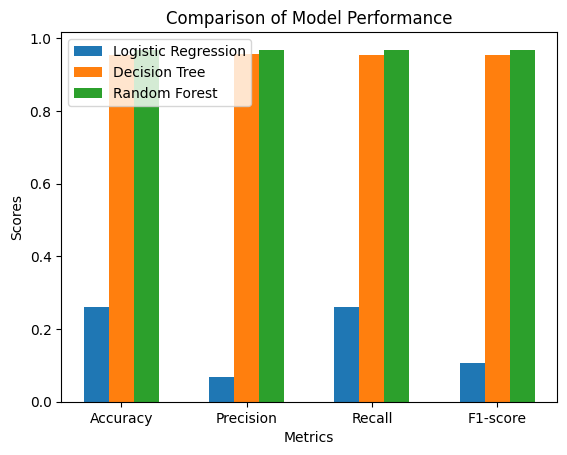

In [5]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/My Drive/processed_BHD1.csv'
data = pd.read_csv(file_path)

# Features and target variable
X = data.drop(columns=['address', 'label', 'label_encoded'])
y = data['label_encoded']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the models
log_reg = LogisticRegression(max_iter=1000)
dec_tree = DecisionTreeClassifier()
rand_forest = RandomForestClassifier(n_estimators=100)

# Train the models
log_reg.fit(X_train, y_train)
dec_tree.fit(X_train, y_train)
rand_forest.fit(X_train, y_train)

# Make predictions
log_reg_pred = log_reg.predict(X_test)
dec_tree_pred = dec_tree.predict(X_test)
rand_forest_pred = rand_forest.predict(X_test)

# Show Confusion Matrix
print("Confusion Matrix: Logistic Regression\n", confusion_matrix(y_test, log_reg_pred))
print("Confusion Matrix: Decision Tree\n", confusion_matrix(y_test, dec_tree_pred))
print("Confusion Matrix: Random Forest\n", confusion_matrix(y_test, rand_forest_pred))

# Evaluate the models
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1

log_reg_metrics = evaluate_model(y_test, log_reg_pred)
dec_tree_metrics = evaluate_model(y_test, dec_tree_pred)
rand_forest_metrics = evaluate_model(y_test, rand_forest_pred)


# Print the metrics
print(f"Logistic Regression: Accuracy = {log_reg_metrics[0]}, Precision = {log_reg_metrics[1]}, Recall = {log_reg_metrics[2]}, F1-score = {log_reg_metrics[3]}")
print(f"Decision Tree: Accuracy = {dec_tree_metrics[0]}, Precision = {dec_tree_metrics[1]}, Recall = {dec_tree_metrics[2]}, F1-score = {dec_tree_metrics[3]}")
print(f"Random Forest: Accuracy = {rand_forest_metrics[0]}, Precision = {rand_forest_metrics[1]}, Recall = {rand_forest_metrics[2]}, F1-score = {rand_forest_metrics[3]}")

# Define the metrics and model names
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
log_reg_scores = [log_reg_metrics[0], log_reg_metrics[1], log_reg_metrics[2], log_reg_metrics[3]]
dec_tree_scores = [dec_tree_metrics[0], dec_tree_metrics[1], dec_tree_metrics[2], dec_tree_metrics[3]]
rand_forest_scores = [rand_forest_metrics[0], rand_forest_metrics[1], rand_forest_metrics[2], rand_forest_metrics[3]]

# Plot the metrics
x = range(len(metrics))
width = 0.2

fig, ax = plt.subplots()
ax.bar(x, log_reg_scores, width, label='Logistic Regression')
ax.bar([p + width for p in x], dec_tree_scores, width, label='Decision Tree')
ax.bar([p + width * 2 for p in x], rand_forest_scores, width, label='Random Forest')

# Set the labels and title
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance')
ax.set_xticks([p + width for p in x])
ax.set_xticklabels(metrics)
ax.legend()

# Show the plot
plt.show()


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Save the model to a file
joblib.dump(rand_forest, '/content/drive/My Drive/random_forest_model.pkl')  # Update this path to your desired location

['/content/drive/My Drive/random_forest_model.pkl']

In [8]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 64.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.2 MB/s eta 0:00:00


In [11]:
%cd /content/drive/My Drive



/content/drive/My Drive


In [12]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# Load the trained model from the specified path
model_path = 'random_forest_model.pkl'  # Update this path to your model's location if necessary
model = joblib.load(model_path)

# Title
st.title("Bitcoin Transaction Fraud Detection")

# Upload CSV data
uploaded_file = st.file_uploader("Choose a file")

if uploaded_file is not None:
    data = pd.read_csv(uploaded_file)
    st.write("Data uploaded successfully!")

    # Assuming 'label_encoded' is the column with labels, dropping it for prediction
    if 'label_encoded' in data.columns:
        data = data.drop('label_encoded', axis=1)

    predictions = model.predict(data)

    st.write("Predictions:")
    st.write(predictions)


Overwriting app.py


                              address  year  day  length    weight  count  \
0   111K8kZAEnJg245r2cM6y9zgJGHZtJPy6  2017   11      18  0.008333    1.0   
1  1123pJv8jzeFQaCV4w644pzQJzVWay2zcA  2016  132      44  0.000244    1.0   
2  112536im7hy6wtKbpH1qYDWtTyMRAcA2p7  2016  246       0  1.000000    1.0   
3  1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7  2016  322      72  0.003906    1.0   
4  1129TSjKtx65E35GiUo4AYVeyo48twbrGX  2016  238     144  0.072848  456.0   

   looped  neighbors       income            label  weight_binary  \
0     0.0        2.0  100050000.0  princetoncerber              0   
1     0.0        1.0  100000000.0   princetonlocky              0   
2     0.0        2.0  200000000.0  princetoncerber              0   
3     0.0        2.0   71200000.0  princetoncerber              0   
4     0.0        1.0  200000000.0   princetonlocky              0   

   label_encoded  
0              8  
1              9  
2              8  
3              8  
4              9  
Accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


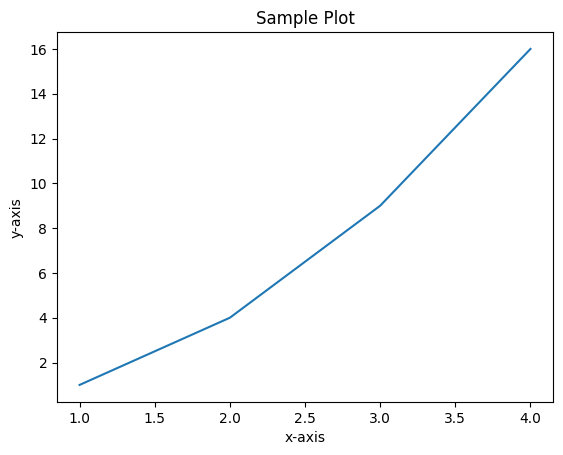

In [14]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Specify the path to your file
file_path = '/content/drive/My Drive/processed_BHD1.csv'

# Load the dataset
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe to verify the data
print(df.head())

# Set the target column
target_column = 'label_encoded'

# Drop irrelevant columns
df = df.drop(['address', 'label'], axis=1)

# Features and target
X = df.drop(target_column, axis=1)
y = df[target_column]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Save the model to a file
joblib.dump(model, 'random_forest_model.pkl')

# Example plot
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.title("Sample Plot")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()
